In [1]:
import pandas as pd
import numpy as np
import os
import re
from dateutil.relativedelta import relativedelta
from statsmodels.tsa import seasonal
from matplotlib import pyplot as plt
from functools import reduce  # Operação de reduce para cálculo de média de uma lista
from datetime import datetime
%matplotlib inline
from tabletext import to_text
from mpl_toolkits.basemap import Basemap, cm
from datetime import datetime
from netCDF4 import Dataset as NetCDFFile
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon


/Users/Tiago/Library/Python/3.6/lib/python/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# Setting values

In [2]:
df=pd.DataFrame(index=['A','B','C'], columns=['x','y'])
df


,x,y
A,NaN,NaN
B,NaN,NaN
C,NaN,NaN


In [3]:
df.set_value('A','x',10)

,x,y
A,10,NaN
B,NaN,NaN
C,NaN,NaN


# Creating dataframe with indexes and column names

In [4]:
test_df = pd.DataFrame(index=range(1973,2018,1), columns=['c1','c2','c3'])
test_df.head()

,c1,c2,c3
1973,NaN,NaN,NaN
1974,NaN,NaN,NaN
1975,NaN,NaN,NaN
1976,NaN,NaN,NaN
1977,NaN,NaN,NaN


In [5]:
test_df.set_value(1973,'c1', 89.13)
test_df.set_value(1974,'c2', 819.52)
test_df.set_value(1975,'c3', 14.35)
test_df.head(5)

,c1,c2,c3
1973,89.13,NaN,NaN
1974,NaN,819.52,NaN
1975,NaN,NaN,14.35
1976,NaN,NaN,NaN
1977,NaN,NaN,NaN


## Merge columns from different dataframes with same index

In [6]:
a_df=pd.DataFrame(index=['A','B','C'], columns=['x','y'])
b_df=pd.DataFrame(index=['A','B','C'], columns=['x','y'])

a_df.set_value('A','x', 1)
a_df.set_value('B','x', 2)
a_df.set_value('C','x', 3)
a_df.set_value('A','y', 4)
a_df.set_value('B','y', 5)
a_df.set_value('C','y', 6)

b_df.set_value('A','x', 7)
b_df.set_value('B','x', 8)
b_df.set_value('C','x', 9)
b_df.set_value('A','y', 10)
b_df.set_value('B','y', 11)
b_df.set_value('C','y', 12)


,x,y
A,7,10
B,8,11
C,9,12


In [7]:
a_df

,x,y
A,1,4
B,2,5
C,3,6


In [8]:
b_df

,x,y
A,7,10
B,8,11
C,9,12


## Add x column from dataframe a

In [9]:
list_b_x = list(b_df['x'])
a_df.loc[:,'z'] = pd.Series(list_b_x, index=a_df.index)
a_df

,x,y,z
A,1,4,7
B,2,5,8
C,3,6,9


# Merge a_df and b_df

In [10]:
df_new = pd.concat([a_df, b_df],axis=1)
df_new

,x,y,z,x,y
A,1,4,7,7,10
B,2,5,8,8,11
C,3,6,9,9,12


In [11]:
# print data as table

In [12]:
data = [[1,2,30],
        [4,23125,6],
        [7,8,999],
        ]

print (to_text(data))


┌───┬───────┬─────┐
│ 1 │     2 │  30 │
├───┼───────┼─────┤
│ 4 │ 23125 │   6 │
├───┼───────┼─────┤
│ 7 │     8 │ 999 │
└───┴───────┴─────┘


In [13]:
def draw_regions():
    # create new figure, axes instances.
    fig = plt.figure()
    # ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
    # setup mercator map projection.
    m = Basemap(llcrnrlon=-60., llcrnrlat=-20., urcrnrlon=15., urcrnrlat=30., \
                rsphere=(6378137.00, 6357752.3142), \
                resolution='l', projection='merc', \
                lat_0=40., lon_0=-20., lat_ts=20.)
    # nylat, nylon are lat/lon of New York
    # nylat = 40.78;
    # nylon = -73.98
    # lonlat, lonlon are lat/lon of London.
    # lonlat = 51.53;
    # lonlon = 0.08
    # draw great circle route between NY and London
    # m.drawgreatcircle(nylon, nylat, lonlon, lonlat, linewidth=2, color='b')
    m.drawcoastlines()
    m.fillcontinents()
    # draw parallels
    m.drawparallels(np.arange(-20, 30, 5), labels=[1, 1, 0, 1])
    # draw meridians
    m.drawmeridians(np.arange(-60, 20, 10), labels=[1, 1, 0, 1])
    # ax.set_title('Great Circle from New York to London')
    m.drawstates()

    # atn
    x1_atn, y1_atn = m(-50,0)
    x2_atn, y2_atn = m(-50, 20)
    x3_atn, y3_atn = m(-20, 20)
    x4_atn, y4_atn = m(-20, 0)
    poly_atn = Polygon([(x1_atn, y1_atn), (x2_atn, y2_atn), (x3_atn, y3_atn), (x4_atn, y4_atn)], facecolor='none', edgecolor='green', linewidth=3)

    # ats
    x1_ats, y1_ats = m(-30,-18)
    x2_ats, y2_ats = m(-30, 0)
    x3_ats, y3_ats = m(0, 0)
    x4_ats, y4_ats = m(0, -18)
    poly_ats = Polygon([(x1_ats, y1_ats), (x2_ats, y2_ats), (x3_ats, y3_ats), (x4_ats, y4_ats)], facecolor='none', edgecolor='blue', linewidth=3)

    # tn
    x1_tn, y1_tn = m(-59,-5)
    x2_tn, y2_tn = m(-59, 27)
    x3_tn, y3_tn = m(15, 27)
    x4_tn, y4_tn = m(15, -5)
    poly_tn = Polygon([(x1_tn, y1_tn), (x2_tn, y2_tn), (x3_tn, y3_tn), (x4_tn, y4_tn)], facecolor='none', edgecolor='yellow', linewidth=3)

    # ts
    x1_ts, y1_ts = m(-59,-20)
    x2_ts, y2_ts = m(-59, 5)
    x3_ts, y3_ts = m(15, 5)
    x4_ts, y4_ts = m(15, -20)
    poly_ts = Polygon([(x1_ts, y1_ts), (x2_ts, y2_ts), (x3_ts, y3_ts), (x4_ts, y4_ts)], facecolor='none', edgecolor='orange', linewidth=3)
    
    # coast1
    x1_coast1, y1_coast1 = m(-40,-5)
    x2_coast1, y2_coast1 = m(-40, 0)
    x3_coast1, y3_coast1 = m(-30, 0)
    x4_coast1, y4_coast1 = m(-30, -5)
    poly_coast1 = Polygon([(x1_coast1, y1_coast1), (x2_coast1, y2_coast1), (x3_coast1, y3_coast1), (x4_coast1, y4_coast1)], facecolor='none', edgecolor='red', linewidth=3)

    # coast2
    x1_coast2, y1_coast2 = m(-50,-10)
    x2_coast2, y2_coast2 = m(-50, 0)
    x3_coast2, y3_coast2 = m(-30, 0)
    x4_coast2, y4_coast2 = m(-30, -10)
    poly_coast2 = Polygon([(x1_coast2, y1_coast2), (x2_coast2, y2_coast2), (x3_coast2, y3_coast2), (x4_coast2, y4_coast2)], facecolor='none', edgecolor='magenta', linewidth=3)

    # coast3
    x1_coast3, y1_coast3 = m(-50,-10)
    x2_coast3, y2_coast3 = m(-50, 5)
    x3_coast3, y3_coast3 = m(-20, 5)
    x4_coast3, y4_coast3 = m(-20, -10)
    poly_coast3 = Polygon([(x1_coast3, y1_coast3), (x2_coast3, y2_coast3), (x3_coast3, y3_coast3), (x4_coast3, y4_coast3)], facecolor='none', edgecolor='cyan', linewidth=3)

    plt.gca().add_patch(poly_atn)
    plt.gca().add_patch(poly_ats)
    plt.gca().add_patch(poly_tn)
    plt.gca().add_patch(poly_ts)
    plt.gca().add_patch(poly_coast1)
    plt.gca().add_patch(poly_coast2)
    plt.gca().add_patch(poly_coast3)
    plt.show()

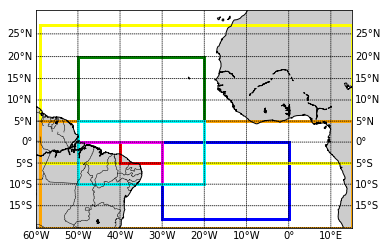

In [14]:
draw_regions()